<a href="https://colab.research.google.com/github/coolphotography/Bank-Marketing-Effectiveness-Prediction/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

In [55]:
# Import libraries
# Basic libs
import pandas as pd
import numpy as np
from numpy import math

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
# Ignore  the warnings
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

from sklearn.decomposition import LatentDirichletAllocation
# Parameters tuning using Grid Search
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MultiLabelBinarizer

# kmeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

### **Data Set Overview**

In [3]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Load the data**

In [4]:
# Read the data
# converts csv file to DataFrame.
netflix_df = pd.read_csv('/content/drive/MyDrive/capstone project - 4/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

**First Five Observations**

In [5]:
# Observing the first five observations using head()
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


OBSERVATION:

We can notice the dataset has Nan. This looks like a typical movies/shows dataset without user ratings.

**Last Five Observations**

In [6]:
# Observing the last five observations using tail()
netflix_df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


**Shape of the Data**

In [7]:
netflix_df.shape

(7787, 12)

The provided data consists of over 7787 observations with 12 column variables.

**Feature Data Types**

In [8]:
# Observing the data types for all the columns.
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


Few columns- director, cast, country, date_added, rating contain null values.

In [9]:
# Feature Statistics Summary
# Provides the statistical details for each column.
netflix_df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


**Data Cleaning**

In [10]:
# For missing data
netflix_df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

There are 2389 null values in director, 718 null values in cast, 507 null values in country, 10 null values in date_added, 7 null values in rating.

In [11]:
# drops NaN values from date_added, rating
# filling director, cast, country - NaN values with No Director, No Cast, Country Not Available respectively.
# Due to the high number of null values in director, cast, and country, dropping them would lead to imbalanced data 
# and incorrect EDA analysis. Therefore, they are retained.

netflix_df['director'].fillna('No Director', inplace=True)
netflix_df['cast'].fillna('No Cast', inplace=True)
netflix_df['country'].fillna('Country Not Available', inplace=True)
netflix_df.dropna(subset=['date_added','rating'],inplace=True)
netflix_df = netflix_df.reset_index(drop=True)

SIDE NOTE:

Instead of dropping all Nan values, only date_added and rating Nan values are removed. Dropping director, cast, and country Nan values would have resulted in a significant loss of data.

In [12]:
# Updated dataframe
netflix_df.shape

(7770, 12)

In [13]:
# Rechecking for clean data.
netflix_df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [14]:
#Checking Unique values in each variable
netflix_df.nunique()

show_id         7770
type               2
title           7770
director        4048
cast            6818
country          682
date_added      1563
release_year      73
rating            14
duration         216
listed_in        491
description     7752
dtype: int64

A show_id is a unique identifier, and no title is repeated. A number of unique values are also contained in director, cast, country, date_added, listed_in, and description.

###**Exploratory Data Analysis**

Text(0.5, 1.0, 'Count of Movies and TV Shows')

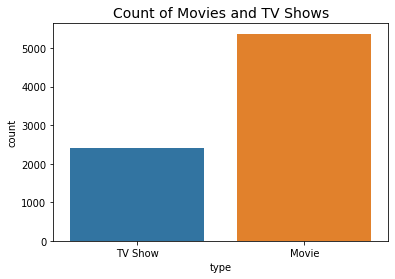

In [15]:
# Netflix Film Types: Movie or TV Show
sns.countplot(x="type", data=netflix_df)
plt.title("Count of Movies and TV Shows", fontsize=14)

Text(0.5, 1.0, 'Pie representation of Movies and TV Shows')

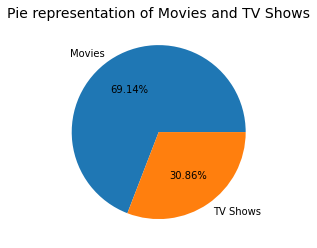

In [16]:
# Pie Chart Representation - Netflix Film Types: Movie or TV Show
plt.pie(netflix_df.type.value_counts(),labels=["Movies","TV Shows"],autopct="%1.2f%%")
plt.title("Pie representation of Movies and TV Shows", fontsize=14)

OBSERVATION:

There are more than 5000+ movies and 2000+ TV shows.It should be noted that a TV Show has at least one season with many episodes, so the TV Shows count being less than Movies is logical.

Text(0.5, 1.0, 'Ratings for Movies & TV Shows')

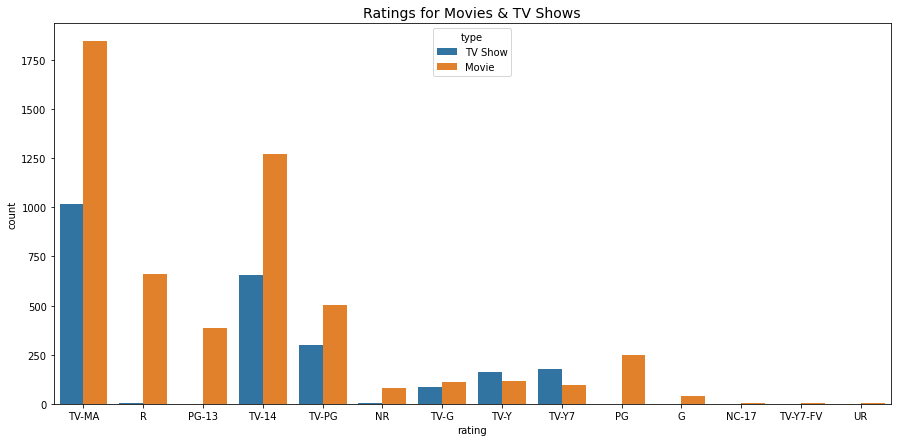

In [17]:
# Netflix Film Ratings
plt.figure(figsize=(15,7))
sns.countplot(x="rating", data=netflix_df, hue='type')
plt.title("Ratings for Movies & TV Shows", fontsize=14)

OBSERVATION:

The NR and UR stand for Non-Rated and UnRated content, so they could be ignored. The number of mature content movies is greater than the number of mature content TV shows. The majority of TV shows are geared toward younger viewers.

In [18]:
# Extracting month and year from date.
netflix_df1 = netflix_df.copy()
netflix_df1['date_added'] = pd.to_datetime(netflix_df1['date_added'])
netflix_df1['month_added'] = netflix_df1['date_added'].dt.month
netflix_df1['year_added'] = netflix_df1['date_added'].dt.year

Text(0.5, 1.0, 'Heatmap - year_added and month_added')

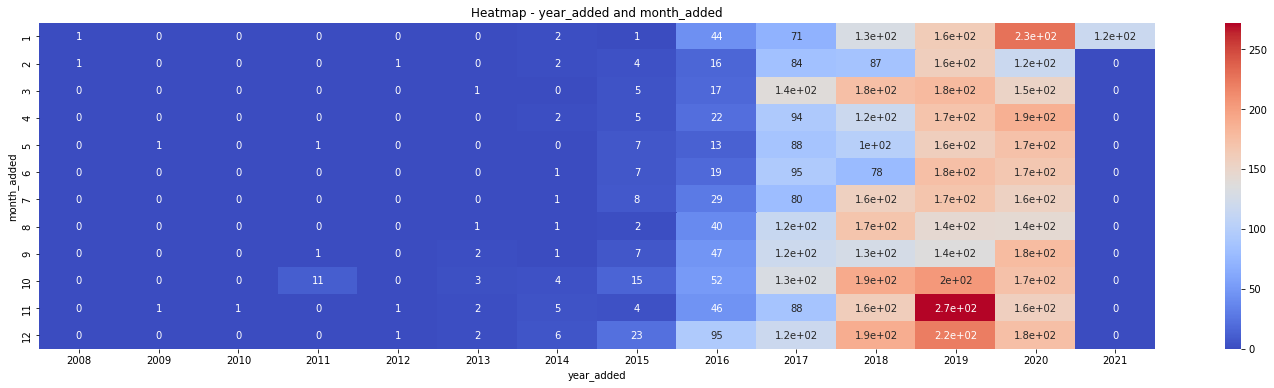

In [19]:
# Plotting year vs month on heatmap.
plt.figure(figsize = (25, 6))
sns.heatmap(netflix_df1.groupby('year_added').month_added.value_counts().unstack().fillna(0).T, cmap = 'coolwarm', annot = True)
plt.title("Heatmap - year_added and month_added")

OBSERVATION:

From 2014 the number of shows have increased. The data given to us stops at 2021 January.

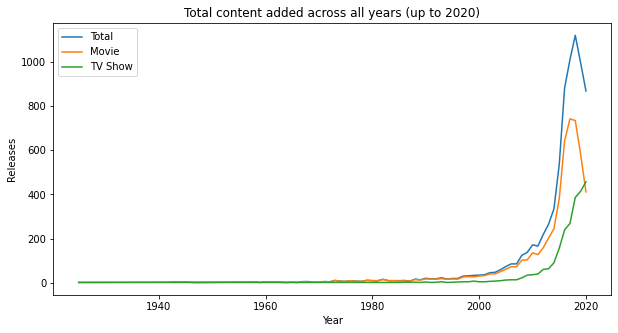

In [20]:
# Amount of Content as a Function of Time
netflix_year = netflix_df1.release_year.value_counts().to_frame().reset_index().rename(columns={'index': 'year','release_year':'count'})
total_year = netflix_year[netflix_year.year != 2021]
netflix_movie_year = netflix_df1[netflix_df1['type'] == 'Movie'].release_year.value_counts().to_frame().reset_index().rename(columns={'index': 'year','release_year':'count'})
movie_year = netflix_movie_year[netflix_movie_year.year!= 2021]
netflix_tvshow_year = netflix_df1[netflix_df1['type'] == 'TV Show'].release_year.value_counts().to_frame().reset_index().rename(columns={'index': 'year','release_year':'count'})
tvshow_year = netflix_tvshow_year[netflix_tvshow_year.year!= 2021]

plt.figure(figsize = (10, 5))
sns.lineplot(data=total_year, x='year', y='count')
sns.lineplot(data=movie_year, x='year', y='count')
sns.lineplot(data=tvshow_year, x='year', y='count')
plt.title('Total content added across all years (up to 2020)')
plt.ylabel('Releases')
plt.xlabel('Year')
plt.legend(['Total','Movie','TV Show'])

OBSERVATION:

The number of movies in 2020 have reduced compared to its previous year. However the TV shows have increased.

Text(0.5, 1.0, 'Duration Distribution for Netflix Movies')

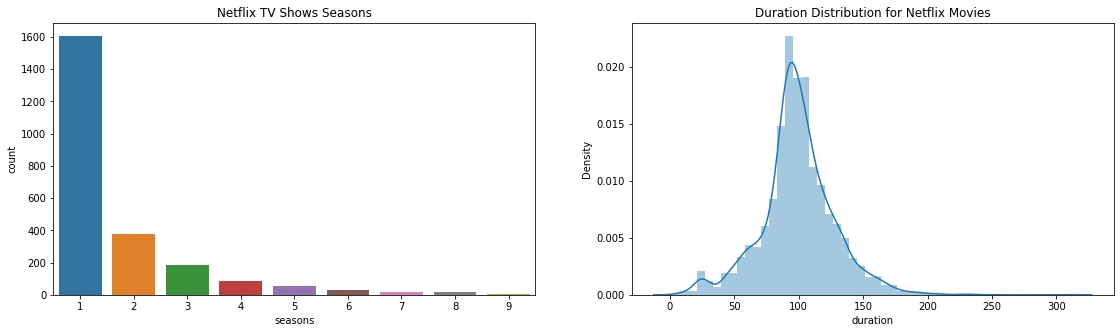

In [21]:
# Netflix Film Duration
fig, ax = plt.subplots(1,2, figsize=(19, 5))
show_duration_df = pd.DataFrame(netflix_df1[netflix_df1.type == 'TV Show'].duration.replace(['1 Season'], '1 Seasons').str.replace(' Seasons','').sort_values()).astype(int)
plt1 = sns.countplot(data = show_duration_df, x = 'duration', order = list(range(1,10)), ax=ax[0])
plt1.set_xlabel('seasons')
plt1.set_title("Netflix TV Shows Seasons")
movie_duration_df = pd.DataFrame(netflix_df1[netflix_df1.type == 'Movie'].duration.str.replace(' min', '').astype(int))
plt2 = sns.distplot(movie_duration_df.duration, ax=ax[1])
plt2.set_title("Duration Distribution for Netflix Movies")

OBSERVATION:

Seasons of Netflix TV shows are right-skewed and most have only one season. Netflix movies have a normal distribution with a mean of 100 minutes.

Text(0, 0.5, 'Country')

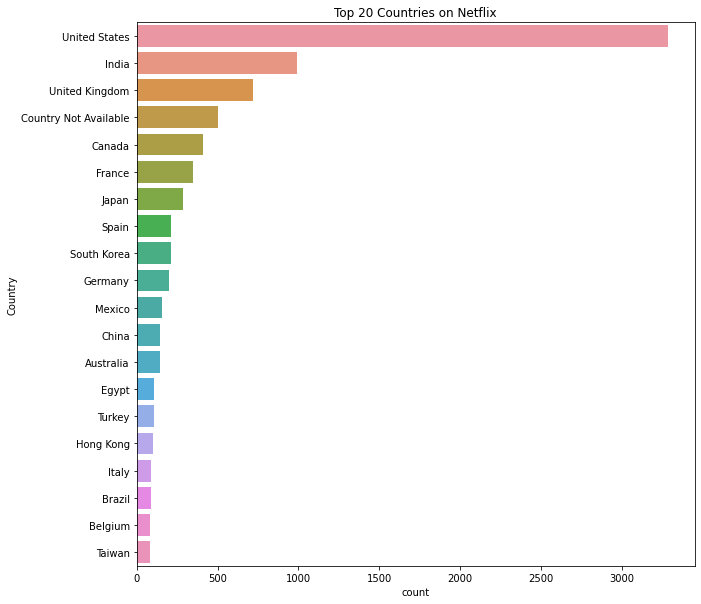

In [22]:
# Countries with the most content available
countries = netflix_df1['country'].str.split(', ', expand=True).stack().reset_index(level = 1, drop = True)
countries = countries[countries != 'Country Not available']
plt.figure(figsize = (10, 10))
sns.countplot(y = countries, order=countries.value_counts().index[:20])
plt.title('Top 20 Countries on Netflix')
plt.ylabel('Country')

OBSERVATION:

Considering that Netflix is an American brand, it is no surprise that the United States is the most popular country to watch Netflix in. In second place is India, followed by the UK and Canada. 

Text(0, 0.5, 'genres')

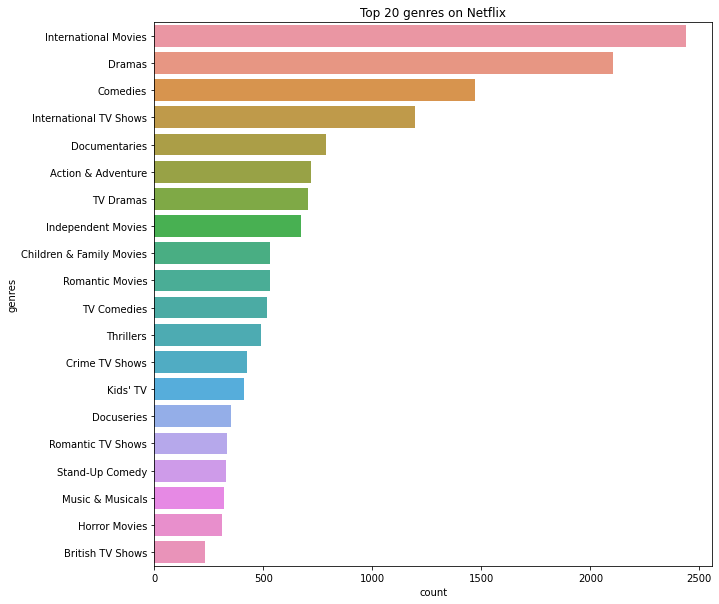

In [23]:
# Popular Genres
genres = netflix_df1['listed_in'].str.split(', ', expand=True).stack().reset_index(level = 1, drop = True)
plt.figure(figsize = (10, 10))
sns.countplot(y = genres, order=genres.value_counts().index[:20])
plt.title('Top 20 genres on Netflix')
plt.ylabel('genres')

OBSERVATION:

On Netflix, international movies are the most popular genre, followed by dramas and comedies. With Netflix having a lot of international subscribers, it makes sense to have international movies at the top.

Text(0, 0.5, 'director')

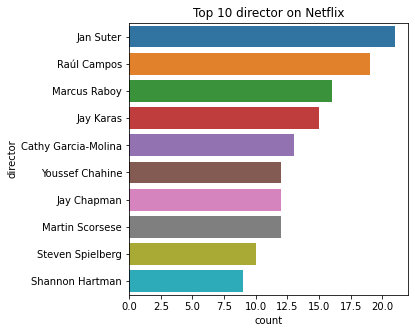

In [24]:
# top 10 directors on Netflix with the most releases
director = netflix_df1['director'].str.split(', ', expand=True).stack().reset_index(level = 1, drop = True)
director = director[director != 'No Director']
plt.figure(figsize = (5, 5))
sns.countplot(y = director, order=director.value_counts().index[:10])
plt.title('Top 10 director on Netflix')
plt.ylabel('director')

OBSERVATION:

The number of international movies is higher, so it should come as no surprise that the most movie directors are internatinal. 

Text(0, 0.5, 'cast')

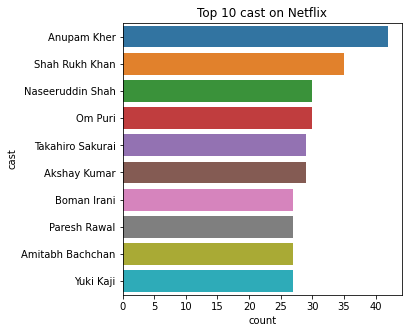

In [25]:
# top 10 actors on Netflix based on number of titles
cast = netflix_df1[netflix_df1['cast'] != 'No Cast'].cast.str.split(', ', expand = True).stack().reset_index(level = 1, drop = True)
plt.figure(figsize = (5, 5))
sns.countplot(y = cast, order=cast.value_counts().index[:10])
plt.title('Top 10 cast on Netflix')
plt.ylabel('cast')

OBSERVATION:

Top actors are mainly international actors implying that Netflix has many international subscribers.

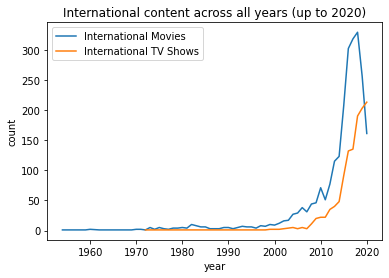

In [26]:
# International Content across years.
international_movies = netflix_df1[netflix_df1['listed_in'].str.contains('International Movies')]
international_movies = pd.DataFrame(international_movies['release_year'].value_counts()).reset_index().rename(columns={'index': 'year','release_year':'count'})
international_movies = international_movies[international_movies.year != 2021]

international_tvshow = netflix_df1[netflix_df1['listed_in'].str.contains('International TV Shows')]
international_tvshow = pd.DataFrame(international_tvshow['release_year'].value_counts()).reset_index().rename(columns={'index': 'year','release_year':'count'})
international_tvshow = international_tvshow[international_tvshow.year != 2021]

sns.lineplot(data=international_movies, x='year', y='count')
sns.lineplot(data=international_tvshow, x='year', y='count')
plt.title("International content across all years (up to 2020)")
plt.legend(['International Movies','International TV Shows'])

OBDERVATION:

More international movies are released than international television shows. The growth of international movies started to decline in 2018 and international TV shows started to decline in 2019.

SUMMARY SO FAR:

1. The most content type on Netflix is movies.
2. The largest count of Netflix content is made with a 'TV-MA' rating.
3. After 2014 the amount of content added has been increasing significantly.
4. The number of movies in 2020 have reduced compared to its previous year. The TV shows have also decreased in 2020.
5. While most TV seasons have only 1 season, movie lengths follow a normal distribution with a mean of 100 minutes.
6. According to the amount of content produced, the United States is the top country.
7. International Movies are a genre mostly found on Netflix.
8. In terms of titles, Jan Suter is the most popular director on Netflix.
9. Anupam Kher is the most popular Netflix cast member, according to number of movies made.

### Understanding what type content is available in different countries

For a detailed analysis, I would enter a single country from the list of more than 100 countries available in the dataset.

In [28]:
# Installing pyLDAvis.
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 4.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=9e6e3d4cfcbb62857098c7670c30ccf20757bcf0cf792fa743e1bdf854816b08
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=be77fa4710179b338c0d6597cf1e3d54e3ad750b859fef628241f7086ecdbd60
  Stored in directory: /root/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built pyLDAvis sklearn


In [29]:
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping


Topic Modelling on specific country dataset.

In [46]:
import pyLDAvis.sklearn
'''
function - 'get_country_specific_content'
Returns DTM, LDA model parameters, and Count Vectorizer for a country specific data.
Arguments passed:
'country' - is input country you want to know.
'''
def get_country_specific_content(country_df):
  # country_df has the single country data.
  reindexed_netflix_data = country_df['description']

  # Count Vectoriser
  count_vectorizer = CountVectorizer(stop_words='english')

  # Obtaining DTM
  Document_term_matrix = count_vectorizer.fit_transform(reindexed_netflix_data.values)

  grid_params = {'n_components' : list(range(5,10))}

  # LDA model
  lda = LatentDirichletAllocation()
  lda_model = GridSearchCV(lda,param_grid=grid_params)
  lda_model.fit(Document_term_matrix)

  # Best LDA model
  best_lda_model = lda_model.best_estimator_

  # Transform and prepare a LDA model’s data for visualization
  pyLDAvis.enable_notebook()
  lda_panel = pyLDAvis.sklearn.prepare(best_lda_model, Document_term_matrix, count_vectorizer, mds='tsne')
  return lda_panel

In [45]:
'''
function - 'get_specific_country_plots'
Plots the following:
1. Count plot for Movies and TV Shows.
2. Count plot for ratings of Movies and TV Shows.
3. Count plot for Top 10 cast.
4. Count plot for Top 10 countries.
5. Count plot for Top 10 TV Shows Seasons.
6. Displot for Duration Distribution for Netflix Movies.
Arguments passed:
'country_df' - Dataset for a specific country.
'''
def get_specific_country_plots(country_df):
  # Count plot for Movies and TV Shows.
  plt.figure(figsize=(31,20))
  plt.subplot(3, 2, 1)
  sns.countplot(x="type", data=country_df)
  plt.title("Count of Movies and TV Shows", fontsize=14)

  plt.subplot(3, 2, 2)
  # Count plot for ratings of Movies and TV Shows.
  sns.countplot(x="rating", data=country_df, hue='type')
  plt.title("Ratings", fontsize=14)

  plt.subplot(3, 2, 3)
  # Count plot for Top 10 cast.
  cast = country_df[country_df['cast'] != 'No Cast'].cast.str.split(', ', expand = True).stack().reset_index(level = 1, drop = True)
  sns.countplot(y = cast, order=cast.value_counts().index[:10])
  plt.title("Top 10 cast", fontsize=14)

  plt.subplot(3, 2, 4)
  # Count plot for Top 10 countries.
  country = country_df.listed_in.str.split(', ', expand = True).stack().reset_index(level = 1, drop = True)
  sns.countplot(y = country, order=country.value_counts().index[:10])
  plt.title("Top 10 country", fontsize=14)

  plt.subplot(3, 2, 5)
  # Count plot for Top 10 TV Shows Seasons.
  show_df = pd.DataFrame(country_df[country_df.type == 'TV Show'].duration.replace(['1 Season'], '1 Seasons').str.replace(' Seasons','').sort_values()).astype(int)
  sns.countplot(data = show_df, x = 'duration', order = list(range(1,10)))
  plt.title("Top 10 TV Shows Seasons", fontsize=14)

  plt.subplot(3, 2, 6)
  # Displot for Duration Distribution for Netflix Movies.
  movie_df = pd.DataFrame(country_df[country_df.type == 'Movie'].duration.str.replace(' min', '').astype(int))
  sns.distplot(movie_df.duration)
  plt.title("Duration Distribution for Netflix Movies", fontsize=14)

Choosing the country to be India.

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
3      150.222153  -72.269554       1        1  25.765245
0       51.163364 -159.968018       2        1  22.357355
4      -73.144554   21.523815       3        1  18.842399
2      -66.410133 -110.606438       4        1  16.629647
1       54.417324   12.443444       5        1  16.405355, topic_info=         Term        Freq       Total Category  logprob  loglift
4594    young  102.000000  102.000000  Default  30.0000  30.0000
2835      old   29.000000   29.000000  Default  29.0000  29.0000
4071  teacher   10.000000   10.000000  Default  28.0000  28.0000
4551    women   19.000000   19.000000  Default  27.0000  27.0000
1580   father   53.000000   53.000000  Default  26.0000  26.0000
...       ...         ...         ...      ...      ...      ...
3665      set    4.327167   18.044872   Topic5  -6.1579   0.3796
1565   family    5.709544   61.227329   Topic5  -5.8807  -0.5649
1726  friends    5.021238   35.169251   Topic5  -6.0091  -0.1389
2091    india    5.073521   49.596780   Topic5  -5.9988  -0.4723
4592    years    4.326723   20.347177   Topic5  -6.1580   0.2594

[402 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
26        5  0.942996           20
81        5  0.942996  accompanies
85        3  0.923262      accuses
98        2  0.900720       actors
115       3  0.923262       adores
...     ...       ...          ...
4594      1  0.214546        young
4594      2  0.458348        young
4594      3  0.136529        young
4594      4  0.068265        young
4594      5  0.126777        young

[717 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 5, 3, 2])

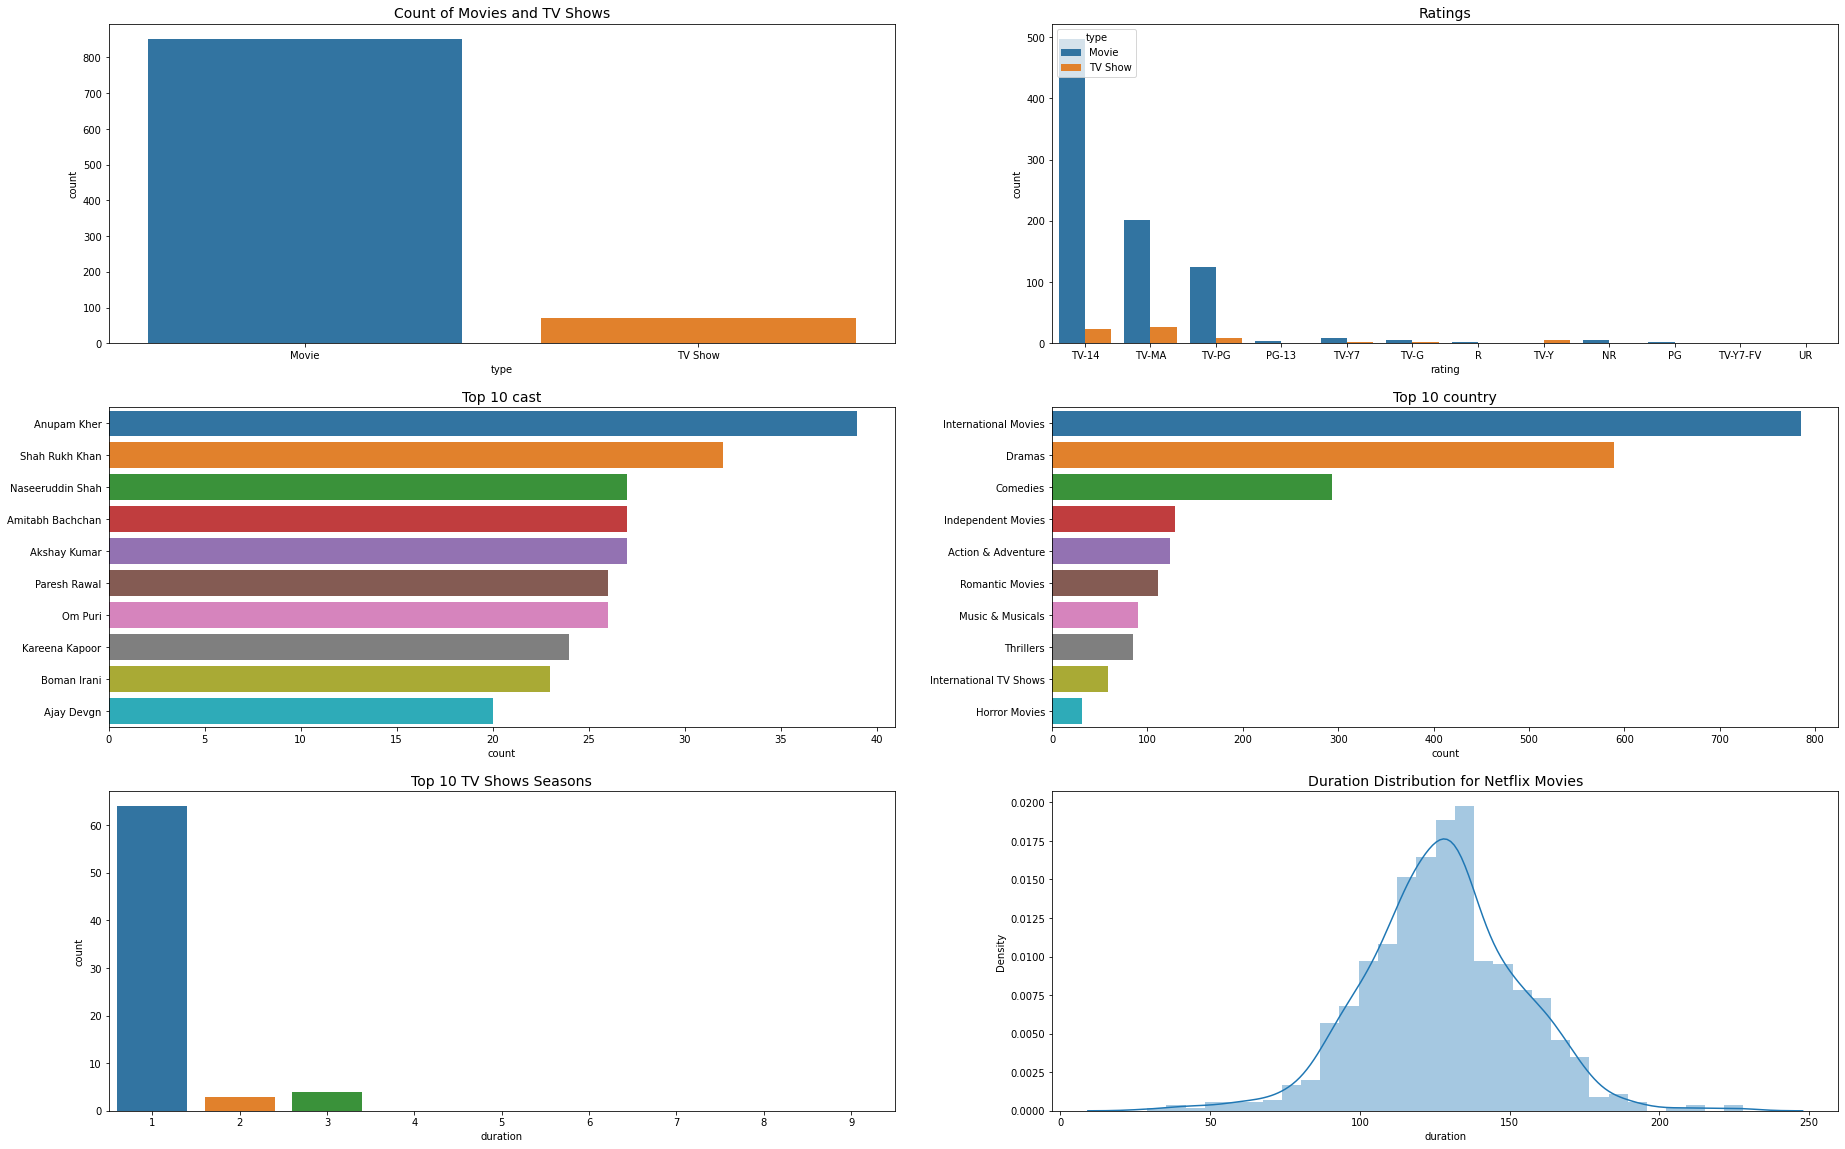

In [47]:
# country_df - Dataset for a speci
country_df = netflix_df1[netflix_df1['country'] == 'India']
country_df = country_df.reset_index(drop = True)
get_specific_country_plots(country_df)
get_country_specific_content(country_df)

### K-Means Clustering

Prior to creating the k-means clustering model perform data featuring such as:
* Fill NaN values with 'Other' value.
* Creating dummies of listed_in columns.
* Dropping 'show_id', 'title', 'director', 'cast', 'country', 'date_added', 'duration', 'description', 'month_added' features.

In [46]:
netlix_df_kmeans = netflix_df1.copy()

In [48]:
netlix_df_kmeans.drop(['show_id', 'title', 'director', 'cast', 'country', 'date_added', 'duration', 'description', 'month_added'], axis = 1, inplace = True)

The dataset contains many unique directors, actors, and countries that are too many to include, so I drop them.

In [49]:
# Fill missing country entries with United States
netlix_df_kmeans.fillna('Other', inplace=True)
netlix_df_kmeans.listed_in = netlix_df_kmeans.listed_in.str.split(', ').tolist()

In [50]:
# Create the MultiLabelBinarizer 
mlb = MultiLabelBinarizer()

# Encode each genre and join to dataframe
mlb_df = netlix_df_kmeans.join(pd.DataFrame(mlb.fit_transform(netlix_df_kmeans.pop('listed_in')),
                                              columns=mlb.classes_,
                                              index=netlix_df_kmeans.index))

In [51]:
mlb_df = pd.get_dummies(mlb_df)

Finding the best fit for k means clustering.

**Create (K-Means) Clusters**

In [52]:
scaler = MinMaxScaler()
sc = scaler.fit_transform(mlb_df)
netflix_df_kmean = pd.DataFrame(sc, columns=list(mlb_df.columns))

Nc = range(2, 35)
kmeans = [KMeans(n_clusters=i, init = 'k-means++') for i in Nc]
score = [kmeans[i].fit(netflix_df_kmean).score(netflix_df_kmean) for i in range(len(kmeans))]

Text(0.5, 1.0, 'Elbow Curve')

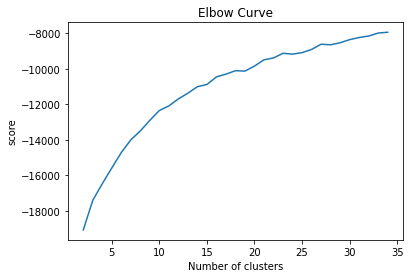

In [56]:
plt.plot(Nc, score)
  
# naming the x axis
plt.xlabel('Number of clusters')
# naming the y axis
plt.ylabel('score')
  
# giving a title to my graph
plt.title('Elbow Curve')

From the elbow curve, it seems to be optimal to choose 20 clusters.

In [57]:
#fitting
kmeans = KMeans(n_clusters=20)
kmeans.fit(netflix_df_kmean)
netflix_df_kmean['cluster'] = kmeans.labels_

Text(0, 0.5, 'Data in a cluster')

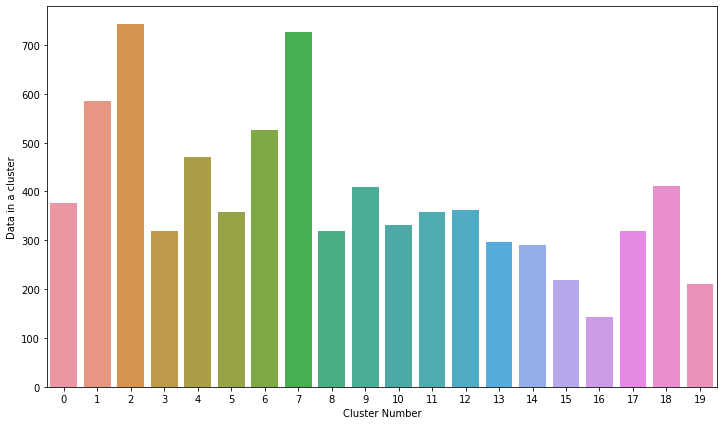

In [58]:
plt.figure(figsize=(12,7))
plt = sns.countplot(netflix_df_kmean['cluster'])
plt.set_xlabel("Cluster Number")
plt.set_ylabel("Data in a cluster")

Testing K-Means

Testing the k-means clustering model using one of the movies, 50 First Dates.

In [59]:
# Get cluster number from given movie or TV show
cluster_num = netflix_df_kmean[netflix_df1.title=='50 First Dates'].cluster.item()

# View cluster the movie or TV show belongs to
netflix_df1[netflix_df_kmean.cluster == cluster_num]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,year_added
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",11,2017
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,1,2020
44,s45,Movie,Æon Flux,Karyn Kusama,"Charlize Theron, Marton Csokas, Jonny Lee Mill...",United States,2018-02-01,2005,PG-13,93 min,"Action & Adventure, Sci-Fi & Fantasy","Aiming to hasten an uprising, the leader of an...",2,2018
50,s51,Movie,"10,000 B.C.",Roland Emmerich,"Steven Strait, Camilla Belle, Cliff Curtis, Jo...","United States, South Africa",2019-06-01,2008,PG-13,109 min,Action & Adventure,Fierce mammoth hunter D'Leh sets out on an imp...,6,2019
70,s72,Movie,16 Blocks,Richard Donner,"Bruce Willis, Mos Def, David Morse, Jenna Ster...","United States, Germany",2019-11-01,2006,PG-13,102 min,Action & Adventure,Tasked with escorting a prosecution witness to...,11,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7664,s7682,Movie,Wyatt Earp,Lawrence Kasdan,"Kevin Costner, Dennis Quaid, Gene Hackman, Dav...",United States,2020-01-01,1994,PG-13,191 min,Action & Adventure,Legendary lawman Wyatt Earp is continually at ...,1,2020
7671,s7689,Movie,XXx,Rob Cohen,"Vin Diesel, Asia Argento, Marton Csokas, Samue...",United States,2019-01-01,2002,PG-13,124 min,"Action & Adventure, Sports Movies",A notorious underground rush-seeker deemed unt...,1,2019
7672,s7690,Movie,XXX: State of the Union,Lee Tamahori,"Ice Cube, Samuel L. Jackson, Willem Dafoe, Sco...",United States,2019-01-01,2005,PG-13,101 min,Action & Adventure,"In this action-packed follow-up to XXX, U.S. i...",1,2019
7688,s7706,Movie,Yes Man,Peyton Reed,"Jim Carrey, Zooey Deschanel, Bradley Cooper, J...","United States, United Kingdom",2020-01-01,2008,PG-13,104 min,"Comedies, Romantic Movies","After a bitter divorce, a bank drone falls und...",1,2020


This cluster primarily contains Action & Adventure movies.

### NLP